In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Import Required Libraries

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split,cross_val_score,KFold
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,QuantileTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix,accuracy_score

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [113]:
data=pd.read_csv("mental_health_social_media_dataset.csv")

# Dataset view

In [114]:
data.shape

(5000, 15)

In [115]:
data.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,Reyansh Ghosh,35,1/1/2024,Male,Instagram,320,160,1,2,7.4,28,2,7,6,Stressed
1,Neha Patel,24,1/12/2024,Female,Instagram,453,226,1,3,6.7,15,3,8,5,Stressed
2,Ananya Naidu,26,1/6/2024,Male,Snapchat,357,196,1,2,7.2,24,3,7,6,Stressed
3,Neha Das,66,1/17/2024,Female,Snapchat,190,105,0,1,8.0,41,2,6,6,Stressed
4,Reyansh Banerjee,31,1/28/2024,Male,Snapchat,383,211,1,2,7.1,22,3,7,6,Stressed


In [116]:
data.tail()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
4995,Sai Menon,42,1/21/2025,Female,WhatsApp,254,64,0,1,7.7,35,1,5,7,At_Risk
4996,Neha Ansari,33,1/26/2025,Female,TikTok,330,214,1,2,7.4,27,3,7,6,Stressed
4997,Aarav Sharma,13,2/6/2025,Male,TikTok,403,262,2,2,7.0,20,4,9,4,Stressed
4998,Aadhya Patil,21,2/17/2025,Male,TikTok,476,309,2,3,6.6,12,4,9,4,Stressed
4999,Shaurya Das,42,2/28/2025,Female,TikTok,249,162,1,1,7.8,35,2,6,6,Stressed


In [117]:
data.duplicated().sum()

np.int64(0)

In [118]:
data.isnull().sum()

person_name                    0
age                            0
date                           0
gender                         0
platform                       0
daily_screen_time_min          0
social_media_time_min          0
negative_interactions_count    0
positive_interactions_count    0
sleep_hours                    0
physical_activity_min          0
anxiety_level                  0
stress_level                   0
mood_level                     0
mental_state                   0
dtype: int64

In [119]:
data.dtypes

person_name                     object
age                              int64
date                            object
gender                          object
platform                        object
daily_screen_time_min            int64
social_media_time_min            int64
negative_interactions_count      int64
positive_interactions_count      int64
sleep_hours                    float64
physical_activity_min            int64
anxiety_level                    int64
stress_level                     int64
mood_level                       int64
mental_state                    object
dtype: object

In [120]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 15 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   person_name                  5000 non-null   object 
 1   age                          5000 non-null   int64  
 2   date                         5000 non-null   object 
 3   gender                       5000 non-null   object 
 4   platform                     5000 non-null   object 
 5   daily_screen_time_min        5000 non-null   int64  
 6   social_media_time_min        5000 non-null   int64  
 7   negative_interactions_count  5000 non-null   int64  
 8   positive_interactions_count  5000 non-null   int64  
 9   sleep_hours                  5000 non-null   float64
 10  physical_activity_min        5000 non-null   int64  
 11  anxiety_level                5000 non-null   int64  
 12  stress_level                 5000 non-null   int64  
 13  mood_level        

# Statistical Analysis

In [121]:
data.describe()

,age,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,29.947800,373.058200,175.331600,0.864200,1.835400,7.134660,22.693400,2.510400,7.107600,5.625800
std,12.279936,106.003916,71.209329,0.555176,0.943443,0.533184,10.602862,0.794996,1.062378,0.759928
min,13.000000,140.000000,35.000000,0.000000,0.000000,6.400000,8.000000,1.000000,5.000000,4.000000
25%,21.000000,310.000000,118.000000,1.000000,1.000000,6.700000,14.000000,2.000000,6.000000,5.000000
50%,27.000000,388.000000,170.000000,1.000000,2.000000,7.100000,21.000000,3.000000,7.000000,6.000000
75%,35.250000,461.000000,231.000000,1.000000,2.000000,7.450000,29.000000,3.000000,8.000000,6.000000
max,69.000000,520.000000,338.000000,2.000000,4.000000,8.300000,46.000000,4.000000,9.000000,7.000000


# Data Visualization

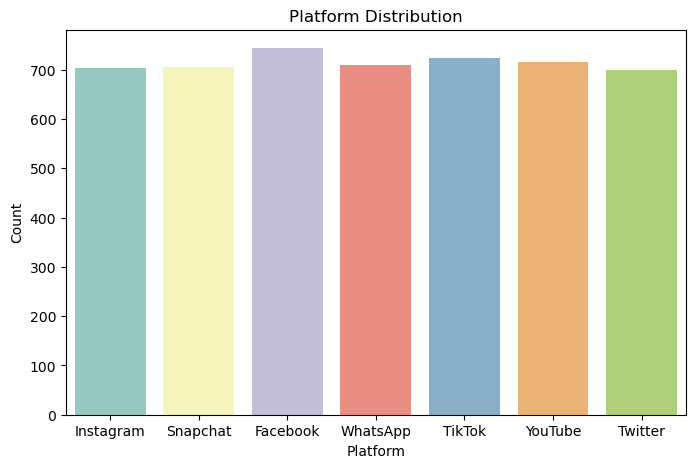

In [122]:
# platform
plt.figure(figsize=(8,5))
sns.countplot(x='platform', data=data, palette='Set3')
plt.title('Platform Distribution')
plt.xlabel('Platform')
plt.ylabel('Count')
plt.show()

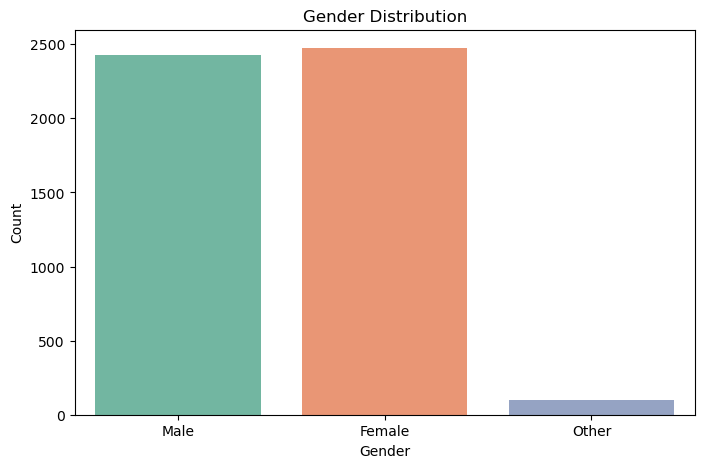

In [123]:
plt.figure(figsize=(8,5))
sns.countplot(x='gender', data=data, palette='Set2')
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

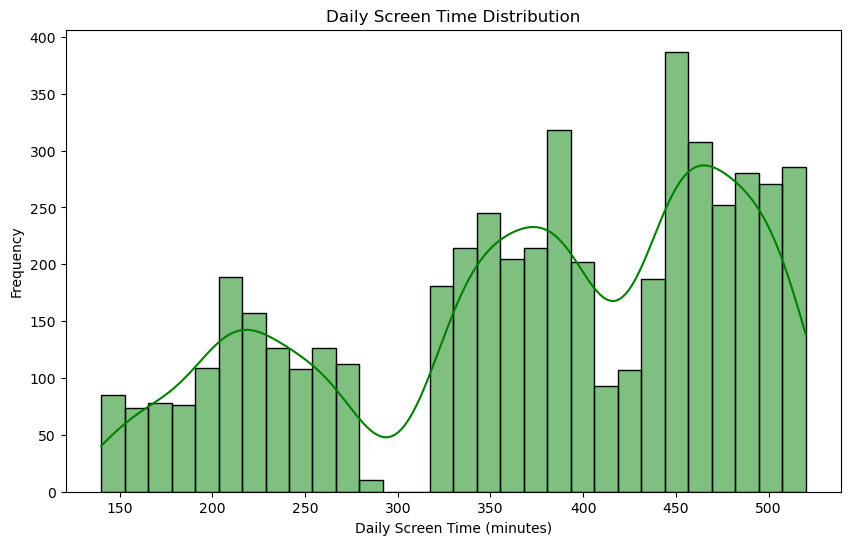

In [124]:
# daily_screen_time_min distribution
plt.figure(figsize=(10,6))
sns.histplot(data['daily_screen_time_min'], bins=30, kde=True, color='green')
plt.title('Daily Screen Time Distribution')
plt.xlabel('Daily Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

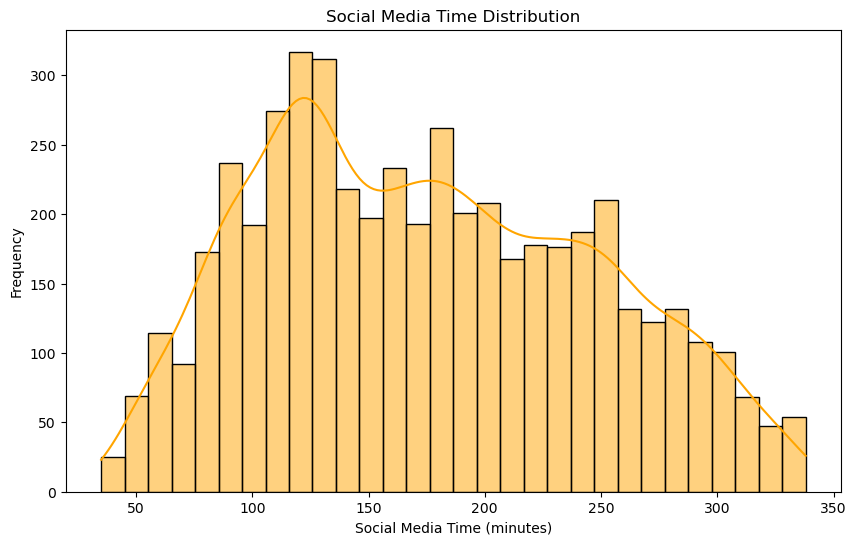

In [125]:
# social_media_time_min distribution
plt.figure(figsize=(10,6))
sns.histplot(data['social_media_time_min'], bins=30, kde=True, color='orange')
plt.title('Social Media Time Distribution')
plt.xlabel('Social Media Time (minutes)')
plt.ylabel('Frequency')
plt.show()


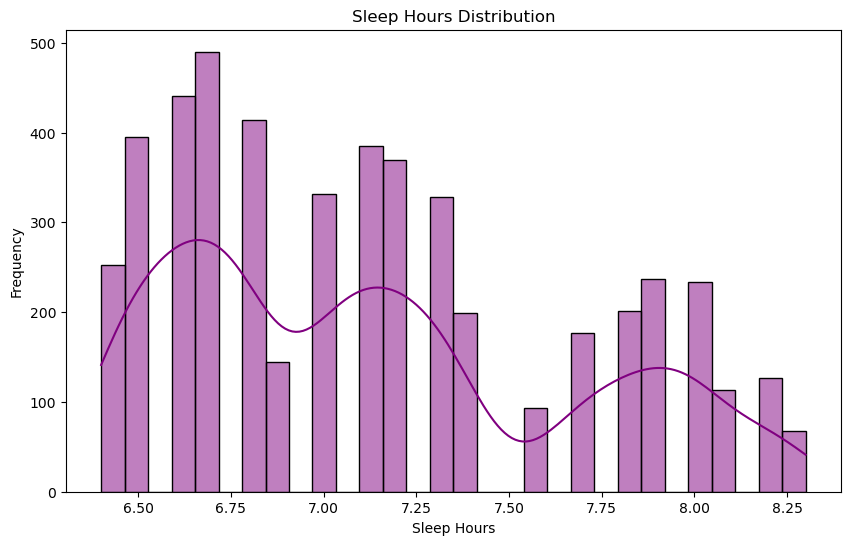

In [126]:
# sleep_hours distribution
plt.figure(figsize=(10,6))
sns.histplot(data['sleep_hours'], bins=30, kde=True, color='purple')
plt.title('Sleep Hours Distribution')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

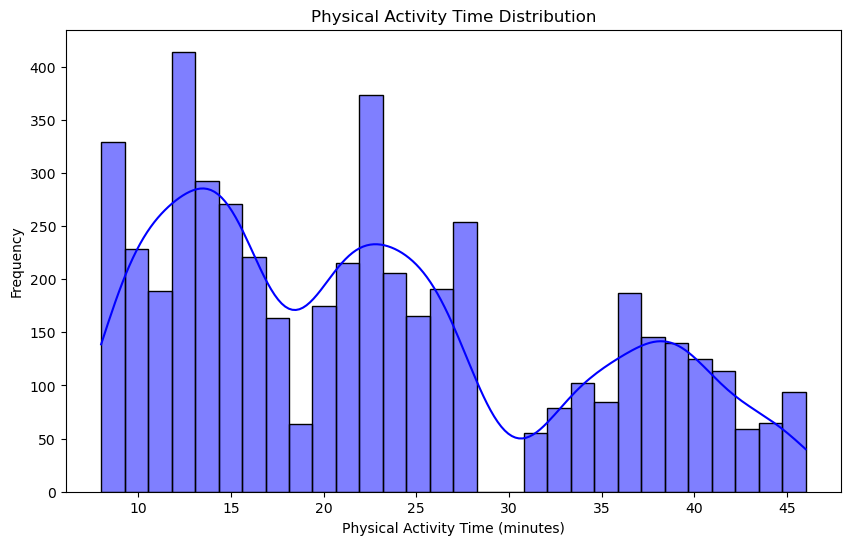

In [127]:
# physical_activity_min distribution
plt.figure(figsize=(10,6))
sns.histplot(data['physical_activity_min'], bins=30, kde=True, color='blue')
plt.title('Physical Activity Time Distribution')
plt.xlabel('Physical Activity Time (minutes)')
plt.ylabel('Frequency')
plt.show()

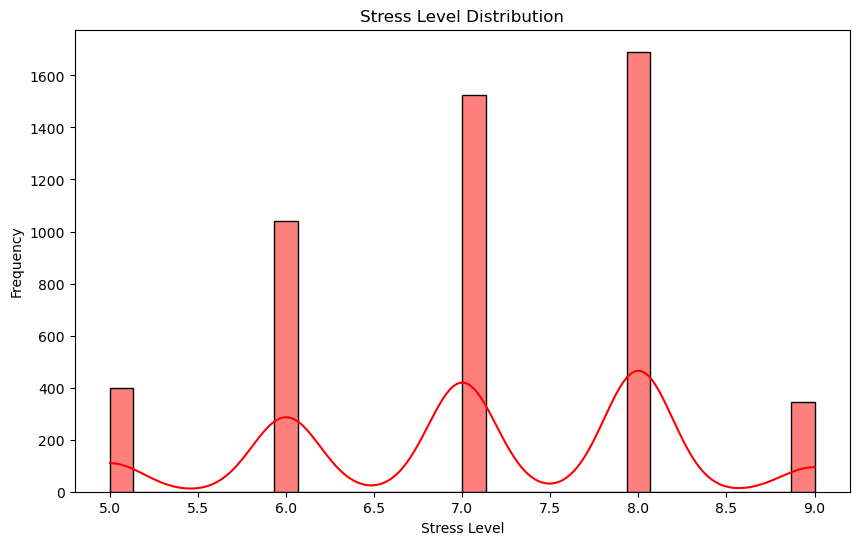

In [128]:
# stress_level distribution
plt.figure(figsize=(10,6))  
sns.histplot(data['stress_level'], bins=30, kde=True, color='red')
plt.title('Stress Level Distribution')
plt.xlabel('Stress Level')
plt.ylabel('Frequency')
plt.show()

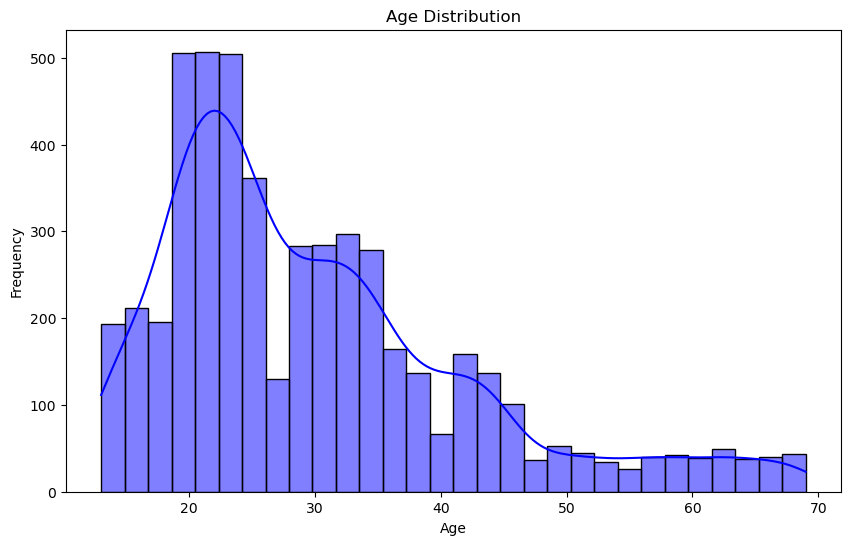

In [129]:
# age distribution
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=30, kde=True, color='blue')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Transformation

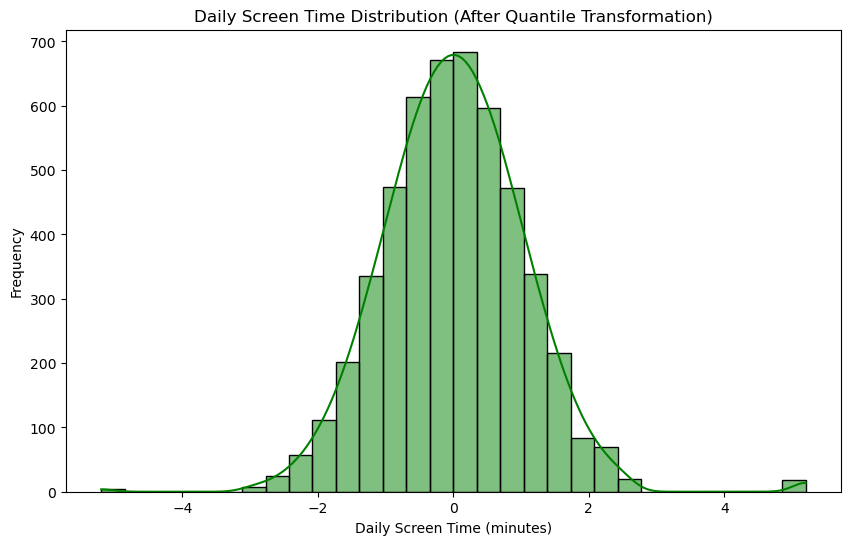

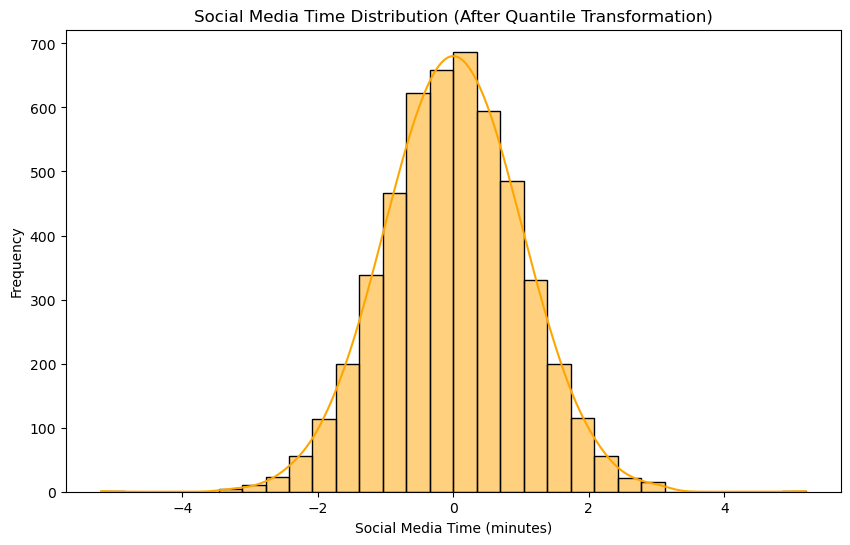

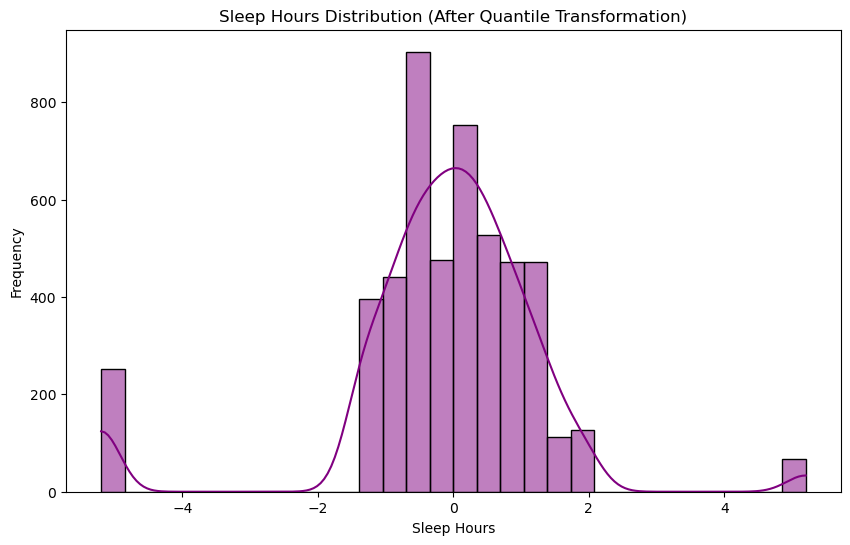

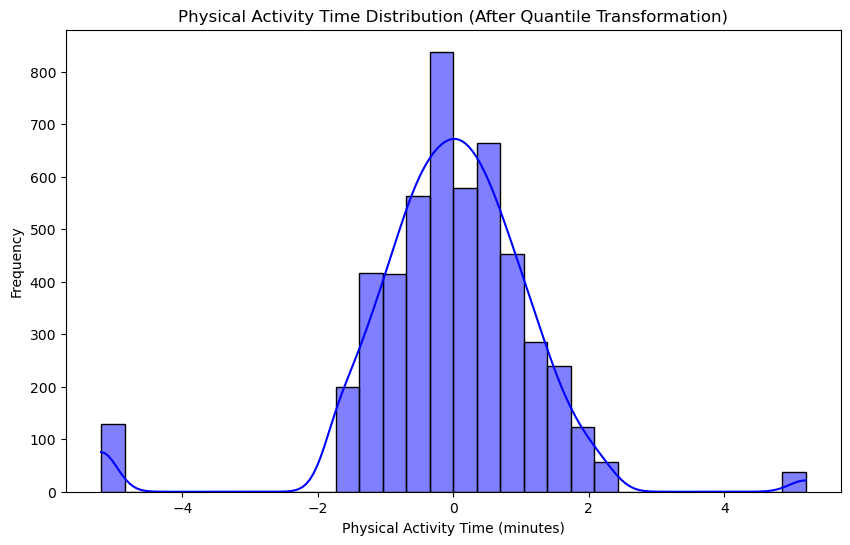

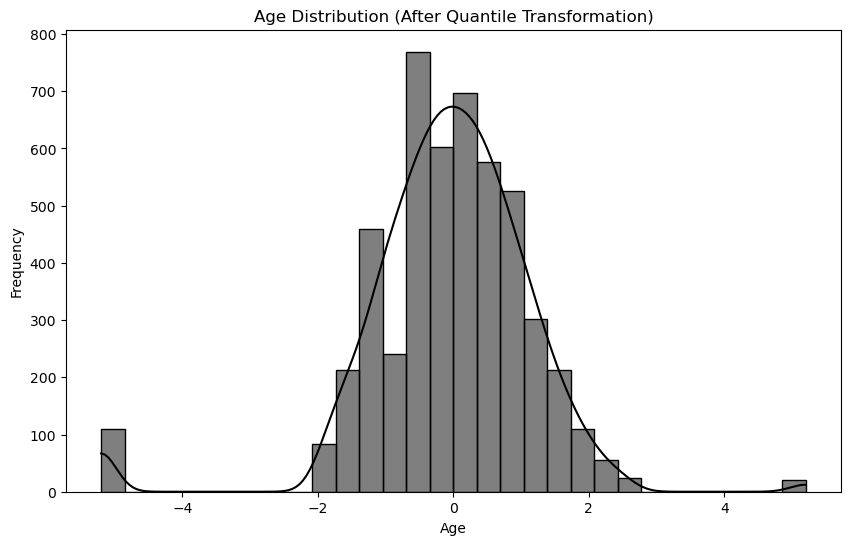

In [130]:
# quantile transformation
qt = QuantileTransformer(output_distribution='normal')
data['daily_screen_time_min'] = qt.fit_transform(data[['daily_screen_time_min']])
data['social_media_time_min'] = qt.fit_transform(data[['social_media_time_min']])
data['sleep_hours'] = qt.fit_transform(data[['sleep_hours']])
data['physical_activity_min'] = qt.fit_transform(data[['physical_activity_min']])
data['age'] = qt.fit_transform(data[['age']])

# daily_screen_time_min distribution after quantile transformation
plt.figure(figsize=(10,6))
sns.histplot(data['daily_screen_time_min'], bins=30, kde=True, color='green')
plt.title('Daily Screen Time Distribution (After Quantile Transformation)')
plt.xlabel('Daily Screen Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# social_media_time_min distribution after quantile transformation
plt.figure(figsize=(10,6))
sns.histplot(data['social_media_time_min'], bins=30, kde=True, color='orange')
plt.title('Social Media Time Distribution (After Quantile Transformation)')
plt.xlabel('Social Media Time (minutes)')
plt.ylabel('Frequency')
plt.show()

# sleep_hours distribution after quantile transformation
plt.figure(figsize=(10,6))
sns.histplot(data['sleep_hours'], bins=30, kde=True, color='purple')
plt.title('Sleep Hours Distribution (After Quantile Transformation)')
plt.xlabel('Sleep Hours')
plt.ylabel('Frequency')
plt.show()

# physical_activity_min distribution after quantile transformation
plt.figure(figsize=(10,6))
sns.histplot(data['physical_activity_min'], bins=30, kde=True, color='blue')
plt.title('Physical Activity Time Distribution (After Quantile Transformation)')
plt.xlabel('Physical Activity Time (minutes)')
plt.ylabel('Frequency')
plt.show()


# age distribution after quantile transformation
plt.figure(figsize=(10,6))
sns.histplot(data['age'], bins=30, kde=True, color='black')
plt.title('Age Distribution (After Quantile Transformation)')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# Data Encoding

In [131]:
for col in data.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
data.head()

,person_name,age,date,gender,platform,daily_screen_time_min,social_media_time_min,negative_interactions_count,positive_interactions_count,sleep_hours,physical_activity_min,anxiety_level,stress_level,mood_level,mental_state
0,630,0.630254,0,1,1,-0.668987,-0.095492,1,2,0.613509,0.644086,2,7,6,2
1,553,-0.256198,6,0,1,0.523537,0.611996,1,3,-0.622621,-0.473810,3,8,5,2
2,164,-0.043924,54,1,2,-0.296607,0.303168,1,2,0.273089,0.273089,3,7,6,2
3,540,2.183092,16,0,2,-1.537691,-0.920412,0,1,1.371657,1.541796,2,6,6,2
4,625,0.301855,40,1,2,-0.060256,0.455640,1,2,0.081638,0.087933,3,7,6,2


# Feature Selection

In [132]:
x=data.drop(columns=['person_name','date','mental_state'],axis=1)
y=data['mental_state']

# Data Split

In [133]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

# Model

In [134]:
# Random Forest Classifier
rf=RandomForestClassifier(n_estimators=100,random_state=42)
rf.fit(x_train,y_train)
y_pred=rf.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred))


Accuracy: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       1.00      1.00      1.00      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[ 12   0   0]
 [  0  73   0]
 [  0   0 915]]


In [135]:
# Logistic Regression
lr=LogisticRegression(C=1,solver='lbfgs',max_iter=1000,random_state=42)
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred_lr))
print(classification_report(y_test,y_pred_lr))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_lr))

Accuracy: 0.998
              precision    recall  f1-score   support

           0       0.92      1.00      0.96        12
           1       0.99      0.99      0.99        73
           2       1.00      1.00      1.00       915

    accuracy                           1.00      1000
   macro avg       0.97      1.00      0.98      1000
weighted avg       1.00      1.00      1.00      1000

Confusion Matrix:
 [[ 12   0   0]
 [  1  72   0]
 [  0   1 914]]


In [136]:
# Support vector machine
svc=SVC(kernel='rbf',C=1,gamma='scale',random_state=42)
svc.fit(x_train,y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [137]:
y_pred_svc=svc.predict(x_test)

print("Accuracy:",accuracy_score(y_test,y_pred_svc))
print(classification_report(y_test,y_pred_svc))
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_svc))

Accuracy: 0.988
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        12
           1       0.86      1.00      0.92        73
           2       1.00      1.00      1.00       915

    accuracy                           0.99      1000
   macro avg       0.62      0.67      0.64      1000
weighted avg       0.98      0.99      0.98      1000

Confusion Matrix:
 [[  0  12   0]
 [  0  73   0]
 [  0   0 915]]


# Feature Importance

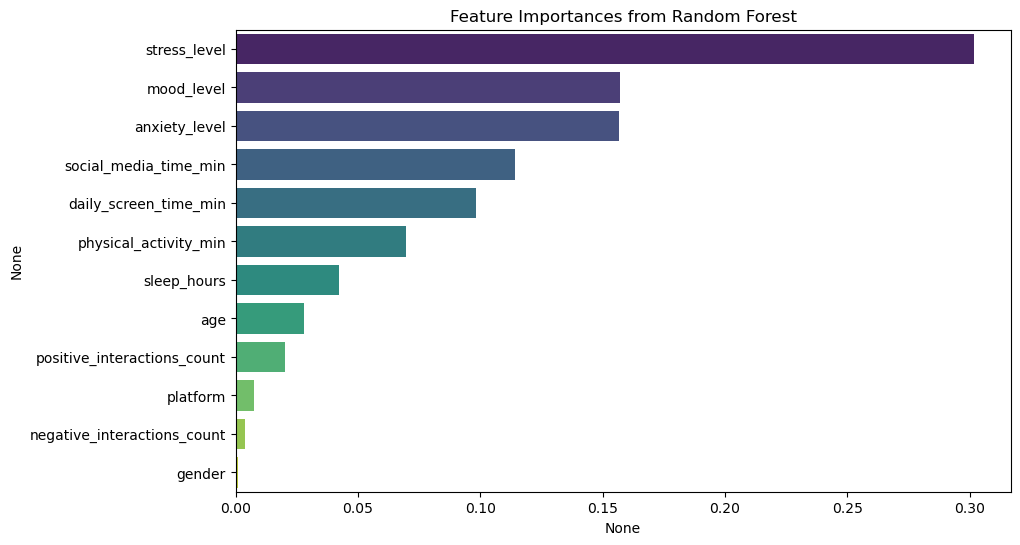

In [138]:
# Random Forest Feature Importance
importances = rf.feature_importances_
feature_names = x.columns
feature_importances = pd.Series(importances, index=feature_names).sort_values(ascending=False)
plt.figure(figsize=(10,6))
sns.barplot(x=feature_importances, y=feature_importances.index, palette='viridis')
plt.title('Feature Importances from Random Forest')
plt.show()

# Note

Because 100% accuracy is redflag in dataScience<br>
So we can reduce that accuracy by adding a feature that is useless<br>
Doing this we can reduce our accuracy

# Again Fit Model

In [139]:
x=data.drop(columns=['date','mental_state'],axis=1)
y=data['mental_state']

kfold=KFold(n_splits=5,shuffle=True,random_state=42)
score=cross_val_score(svc,x,y,cv=kfold,scoring='accuracy')
print("Cross-Validation Scores:",score)
print("Mean Cross-Validation Score:",score.mean())

Cross-Validation Scores: [0.915 0.928 0.927 0.903 0.928]
Mean Cross-Validation Score: 0.9202


Now our Support Vector Classifier have 92% accuracy<br>
Thanks!